___
# Capítulo 7 - Modelos de Aprendizado
## Seção 4 - Regressão logística
___

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.stats import spearmanr
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

caminho = 'C:/Users/booth13-mgr2/Documents/Arquivos_de_Exercicio/dados/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
carros.head()

### Regressão Logística em mtcars

drat contem dados em relacao ao eixo traseiro do carro


carb o numero de carburadores

am cambio automatico ou manual 

In [4]:
carros_colunas = ['drat','carb']
carros_dados = carros[carros_colunas].values

y = carros['am'].values

#### Checando se são variáveis categoricas

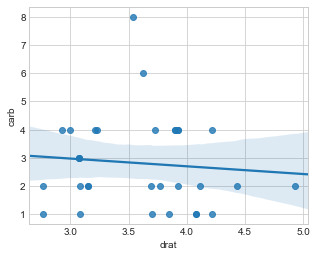

In [5]:
sns.regplot(x='drat', y='carb', data=carros, scatter=True)

#### Checando se as variáveis são independentes

In [6]:
drat = carros['drat']
carb = carros['carb']

spearmanr_coef, p_value =  spearmanr(drat, carb)
print('Spearman Rank Correlation Coefficient {:.2}'.format(spearmanr_coef))

Spearman Rank Correlation Coefficient -0.13


#### Conferindo se temos valores nulos

In [7]:
carros.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

#### Conferindo se o target é binário ou ordinal

mostra a contagem de cada valor na nossa variavel

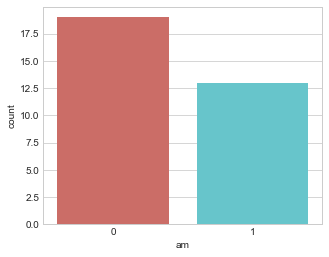

In [8]:
sns.countplot(x='am', data=carros, palette='hls')

#### Conferindo se o dado é grande o suficiente

In [9]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


#### Deploying and evaluating your model

In [13]:
X = scale(carros_dados)

In [14]:
LogReg = LogisticRegression()

LogReg.fit(X,y)
print(LogReg.score(X,y))

0.8125


In [15]:
y_pred = LogReg.predict(X)
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32

